In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
def define_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding ='same', activation='relu', input_shape=(124,124,3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

In [9]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 128)       0

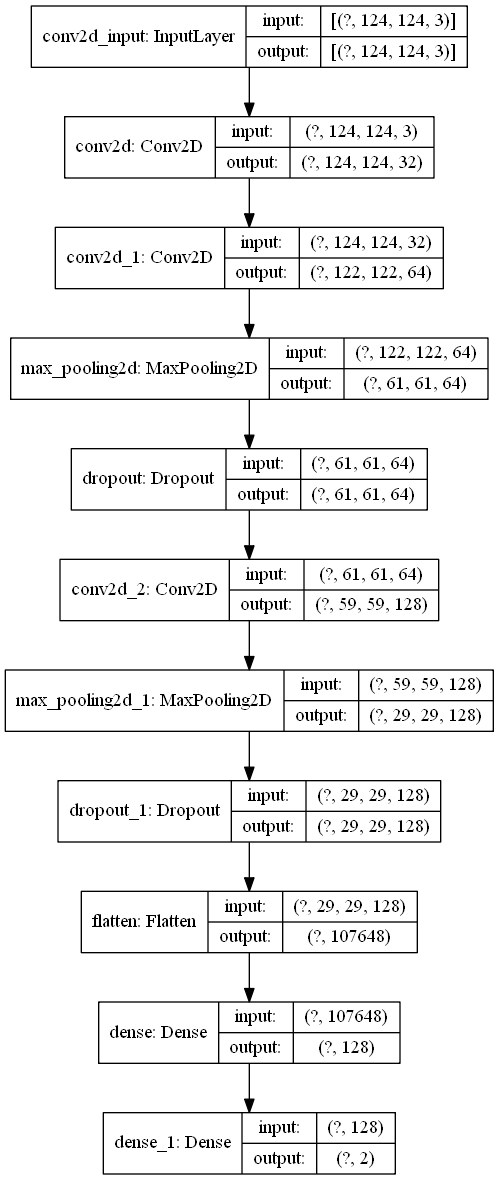

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model2.png', show_shapes=True, show_layer_names=True)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = "Train/"
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      brightness_range=[0.3,1.0],
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size=(124, 124),
                                                    batch_size=32,
                                                    class_mode='categorical')

VALIDATION_DIR = "Test/"
validation_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      brightness_range=[0.3,1.0],
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(124, 124),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 1755 images belonging to 2 classes.
Found 439 images belonging to 2 classes.


In [12]:
import datetime
import os

In [13]:
path = r'C:\Users\msi\Mini_projet\face mask detector\tensorboard'
log_dir = os.path.join(path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [14]:
def train_model(model):
    history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=[tensorboard_callback])

In [15]:
train_model(model)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 55 steps, validate for 14 steps
Epoch 1/10
55/55 [==============================] - 51s 923ms/step - loss: 0.6538 - accuracy: 0.5385 - val_loss: 0.5480 - val_accuracy: 0.5421
Epoch 2/10
55/55 [==============================] - 51s 923ms/step - loss: 0.5349 - accuracy: 0.5487 - val_loss: 0.5195 - val_accuracy: 0.5513
Epoch 3/10
55/55 [==============================] - 52s 953ms/step - loss: 0.5096 - accuracy: 0.5829 - val_loss: 0.5229 - val_accuracy: 0.8292
Epoch 4/10
55/55 [==============================] - 54s 981ms/step - loss: 0.4949 - accuracy: 0.8285 - val_loss: 0.5119 - val_accuracy: 0.8770
Epoch 5/10
55/55 [==============================] - 50s 907ms/step - loss: 0.3308 - accuracy: 0.8832 - val_loss: 0.3103 - val_accuracy: 0.8815
Epoch 6/10
55/55 [==============================] - 49s 895ms/step - loss: 0.2705 - accuracy: 0.8974 - val_loss: 0.2730 - val_accuracy: 0.9021
Epoch 7/10
55/55 [==============================] 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [20]:
model.save('model_2.h5')